### Часть 1. Cбор страничек с отзывами

In [1]:
import os
import random
import requests
import time

s:\dev\portable python-3.9.4\app\python\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [4]:
# Задание ф-й.
def taking_review_pages (start_page, end_page, errors=1, pause_max_lasting=1):
    """
    Функция собирает отзывы со страниц https://tabiturient.ru/sliv/n/?<page_num>
    и сохраняет html-код в отдельные файлы в папке "reviews"

    Функция принимает аргументы:
    start_page - первая страница диапазона
    end_page - последняя страница диапазона,
    errors - параметр, задающий необходимость парсить повторно страницы,
             которые не получилось спарсить с первого раза. По уполчанию такие страницы
             парсятся повторно.
    pause_max_lasting - максимальная продолжительность паузы менжду итерациями. По умолч. - 1 сек.

    Функция ничего не возвращает, при параметрах по умолчанию или возвращает список
    страниц, корорые не удалось спарсить с первого раза (параметр errors=0)
    """
    try:
        os.mkdir('reviews')
        print('Создан каталог "reviews"')
    except FileExistsError:
        print('Каталог "reviews" уже существует')

    ungetting_pages = []  # ошибки парсинга будем складывать сюда
    
    for page_number in range(start_page, end_page+1):
        url = 'https://tabiturient.ru/sliv/n/?' + str(page_number)
        pause = random.randint(0, pause_max_lasting)  # величина случайной паузы между итерациями
        file_name = str(page_number).zfill(4)

        # Запрашиваем очередную страницу, сохраняем содержимое в отдельный файл, выводим отчет
        try:
            with open(f'reviews/{file_name}.html', "w", encoding="utf-8") as file:
                file.write(requests.get(url).text)
            print(f'Файл {file_name}.html сохранен в папку reviews. Ждем {pause} сек...')

        # если что-то пойдет не так - сообщаем, сохраняем номер не спарсенной страницы в список, ждем...
        except Exception as ex:
            print(ex)
            ungetting_pages.append(page_number)
            time.sleep(pause * 5)
        # немного ждем перед следующей итерацией
        finally:
            time.sleep(pause)
            
    
    if errors:
        # Обработка страниц, которые не получилось собрать с первого раза
        if ungetting_pages:        
            taking_review_errors_pages(ungetting_pages, pause_max_lasting)
        else:
            print('Сбор сраниц с отзывами завершен без ошибок. Отзывы сохранены в папе "reviews"')
    else:
        if ungetting_pages:
            print(f'Сбор сраниц с отзывами завершен с ошибками. Отзывы сохранены в папе "reviews", \
            ошибки возникли на страницах: {ungetting_pages}')
            return ungetting_pages
        else:
            print('Сбор сраниц с отзывами завершен без ошибок. Отзывы сохранены в папе "reviews"' )

def taking_review_errors_pages(ungetting_pages, pause_max_lasting=1):
    """
    Функция повторно парсит страницы https://tabiturient.ru/sliv/n/?<page_num>,
    которые не удалось спарсить в первый раз, и сохраняет html-код в отдельные файлы
    в папке "reviews".

    Прнимаемые аргументы:
    :param ungetting_pages: - список из номеров "проблемных" страниц
    :param pause_max_lasting: - максимальная продолжительность паузы между итерациями
    :return: - функция ничего не возвращает
    """
    print("Повторный обход страниц, на которых возникли ошибки", ungetting_pages)
    while ungetting_pages:
        page_number = ungetting_pages.pop(0)
        pause = random.randint(0, pause_max_lasting)
        url = 'https://tabiturient.ru/sliv/n/?' + str(page_number)
        try:
            with open(f'reviews/{str(page_number).zfill(4)}.html', "w", encoding="utf-8") as file:
                file.write(requests.get(url).text)
            print(f'Файл {str(page_number).zfill(4)}.html сохранен в папку reviews. Ждем {pause} сек...')

        except Exception as ex:
            print(ex)
            ungetting_pages.append(page_number)
            time.sleep(pause * 5)
        finally:
            time.sleep(pause)
    print("Сбор страниц завершен. Можено перейти ко второму этапу - парсингу интересующих нас данных.")

In [3]:
taking_review_pages(12, 4600, pause_max_lasting=0)

Создан каталог "reviews"
Файл 0012.html сохранен в папку reviews. Ждем 0 сек...
Файл 0013.html сохранен в папку reviews. Ждем 0 сек...
Файл 0014.html сохранен в папку reviews. Ждем 0 сек...
Файл 0015.html сохранен в папку reviews. Ждем 0 сек...
Файл 0016.html сохранен в папку reviews. Ждем 0 сек...
Файл 0017.html сохранен в папку reviews. Ждем 0 сек...
Файл 0018.html сохранен в папку reviews. Ждем 0 сек...
Файл 0019.html сохранен в папку reviews. Ждем 0 сек...
Файл 0020.html сохранен в папку reviews. Ждем 0 сек...
Файл 0021.html сохранен в папку reviews. Ждем 0 сек...
Файл 0022.html сохранен в папку reviews. Ждем 0 сек...
Файл 0023.html сохранен в папку reviews. Ждем 0 сек...
Файл 0024.html сохранен в папку reviews. Ждем 0 сек...
Файл 0025.html сохранен в папку reviews. Ждем 0 сек...
Файл 0026.html сохранен в папку reviews. Ждем 0 сек...
Файл 0027.html сохранен в папку reviews. Ждем 0 сек...
Файл 0028.html сохранен в папку reviews. Ждем 0 сек...
Файл 0029.html сохранен в папку reviews.

Файл 0161.html сохранен в папку reviews. Ждем 0 сек...
Файл 0162.html сохранен в папку reviews. Ждем 0 сек...
Файл 0163.html сохранен в папку reviews. Ждем 0 сек...
Файл 0164.html сохранен в папку reviews. Ждем 0 сек...
Файл 0165.html сохранен в папку reviews. Ждем 0 сек...
Файл 0166.html сохранен в папку reviews. Ждем 0 сек...
Файл 0167.html сохранен в папку reviews. Ждем 0 сек...
Файл 0168.html сохранен в папку reviews. Ждем 0 сек...
Файл 0169.html сохранен в папку reviews. Ждем 0 сек...
Файл 0170.html сохранен в папку reviews. Ждем 0 сек...
Файл 0171.html сохранен в папку reviews. Ждем 0 сек...
Файл 0172.html сохранен в папку reviews. Ждем 0 сек...
Файл 0173.html сохранен в папку reviews. Ждем 0 сек...
Файл 0174.html сохранен в папку reviews. Ждем 0 сек...
Файл 0175.html сохранен в папку reviews. Ждем 0 сек...
Файл 0176.html сохранен в папку reviews. Ждем 0 сек...
Файл 0177.html сохранен в папку reviews. Ждем 0 сек...
Файл 0178.html сохранен в папку reviews. Ждем 0 сек...
Файл 0179.

Файл 0310.html сохранен в папку reviews. Ждем 0 сек...
Файл 0311.html сохранен в папку reviews. Ждем 0 сек...
Файл 0312.html сохранен в папку reviews. Ждем 0 сек...
Файл 0313.html сохранен в папку reviews. Ждем 0 сек...
Файл 0314.html сохранен в папку reviews. Ждем 0 сек...
Файл 0315.html сохранен в папку reviews. Ждем 0 сек...
Файл 0316.html сохранен в папку reviews. Ждем 0 сек...
Файл 0317.html сохранен в папку reviews. Ждем 0 сек...
Файл 0318.html сохранен в папку reviews. Ждем 0 сек...
Файл 0319.html сохранен в папку reviews. Ждем 0 сек...
Файл 0320.html сохранен в папку reviews. Ждем 0 сек...
Файл 0321.html сохранен в папку reviews. Ждем 0 сек...
Файл 0322.html сохранен в папку reviews. Ждем 0 сек...
Файл 0323.html сохранен в папку reviews. Ждем 0 сек...
Файл 0324.html сохранен в папку reviews. Ждем 0 сек...
Файл 0325.html сохранен в папку reviews. Ждем 0 сек...
Файл 0326.html сохранен в папку reviews. Ждем 0 сек...
Файл 0327.html сохранен в папку reviews. Ждем 0 сек...
Файл 0328.

Файл 0459.html сохранен в папку reviews. Ждем 0 сек...
Файл 0460.html сохранен в папку reviews. Ждем 0 сек...
Файл 0461.html сохранен в папку reviews. Ждем 0 сек...
Файл 0462.html сохранен в папку reviews. Ждем 0 сек...
Файл 0463.html сохранен в папку reviews. Ждем 0 сек...
Файл 0464.html сохранен в папку reviews. Ждем 0 сек...
Файл 0465.html сохранен в папку reviews. Ждем 0 сек...
Файл 0466.html сохранен в папку reviews. Ждем 0 сек...
Файл 0467.html сохранен в папку reviews. Ждем 0 сек...
Файл 0468.html сохранен в папку reviews. Ждем 0 сек...
Файл 0469.html сохранен в папку reviews. Ждем 0 сек...
Файл 0470.html сохранен в папку reviews. Ждем 0 сек...
Файл 0471.html сохранен в папку reviews. Ждем 0 сек...
Файл 0472.html сохранен в папку reviews. Ждем 0 сек...
Файл 0473.html сохранен в папку reviews. Ждем 0 сек...
Файл 0474.html сохранен в папку reviews. Ждем 0 сек...
Файл 0475.html сохранен в папку reviews. Ждем 0 сек...
Файл 0476.html сохранен в папку reviews. Ждем 0 сек...
Файл 0477.

Файл 0608.html сохранен в папку reviews. Ждем 0 сек...
Файл 0609.html сохранен в папку reviews. Ждем 0 сек...
Файл 0610.html сохранен в папку reviews. Ждем 0 сек...
Файл 0611.html сохранен в папку reviews. Ждем 0 сек...
Файл 0612.html сохранен в папку reviews. Ждем 0 сек...
Файл 0613.html сохранен в папку reviews. Ждем 0 сек...
Файл 0614.html сохранен в папку reviews. Ждем 0 сек...
Файл 0615.html сохранен в папку reviews. Ждем 0 сек...
Файл 0616.html сохранен в папку reviews. Ждем 0 сек...
Файл 0617.html сохранен в папку reviews. Ждем 0 сек...
Файл 0618.html сохранен в папку reviews. Ждем 0 сек...
Файл 0619.html сохранен в папку reviews. Ждем 0 сек...
Файл 0620.html сохранен в папку reviews. Ждем 0 сек...
Файл 0621.html сохранен в папку reviews. Ждем 0 сек...
Файл 0622.html сохранен в папку reviews. Ждем 0 сек...
Файл 0623.html сохранен в папку reviews. Ждем 0 сек...
Файл 0624.html сохранен в папку reviews. Ждем 0 сек...
Файл 0625.html сохранен в папку reviews. Ждем 0 сек...
Файл 0626.

Файл 0757.html сохранен в папку reviews. Ждем 0 сек...
Файл 0758.html сохранен в папку reviews. Ждем 0 сек...
Файл 0759.html сохранен в папку reviews. Ждем 0 сек...
Файл 0760.html сохранен в папку reviews. Ждем 0 сек...
Файл 0761.html сохранен в папку reviews. Ждем 0 сек...
Файл 0762.html сохранен в папку reviews. Ждем 0 сек...
Файл 0763.html сохранен в папку reviews. Ждем 0 сек...
Файл 0764.html сохранен в папку reviews. Ждем 0 сек...
Файл 0765.html сохранен в папку reviews. Ждем 0 сек...
Файл 0766.html сохранен в папку reviews. Ждем 0 сек...
Файл 0767.html сохранен в папку reviews. Ждем 0 сек...
Файл 0768.html сохранен в папку reviews. Ждем 0 сек...
Файл 0769.html сохранен в папку reviews. Ждем 0 сек...
Файл 0770.html сохранен в папку reviews. Ждем 0 сек...
Файл 0771.html сохранен в папку reviews. Ждем 0 сек...
Файл 0772.html сохранен в папку reviews. Ждем 0 сек...
Файл 0773.html сохранен в папку reviews. Ждем 0 сек...
Файл 0774.html сохранен в папку reviews. Ждем 0 сек...
Файл 0775.

Файл 0906.html сохранен в папку reviews. Ждем 0 сек...
Файл 0907.html сохранен в папку reviews. Ждем 0 сек...
Файл 0908.html сохранен в папку reviews. Ждем 0 сек...
Файл 0909.html сохранен в папку reviews. Ждем 0 сек...
Файл 0910.html сохранен в папку reviews. Ждем 0 сек...
Файл 0911.html сохранен в папку reviews. Ждем 0 сек...
Файл 0912.html сохранен в папку reviews. Ждем 0 сек...
Файл 0913.html сохранен в папку reviews. Ждем 0 сек...
Файл 0914.html сохранен в папку reviews. Ждем 0 сек...
Файл 0915.html сохранен в папку reviews. Ждем 0 сек...
Файл 0916.html сохранен в папку reviews. Ждем 0 сек...
Файл 0917.html сохранен в папку reviews. Ждем 0 сек...
Файл 0918.html сохранен в папку reviews. Ждем 0 сек...
Файл 0919.html сохранен в папку reviews. Ждем 0 сек...
Файл 0920.html сохранен в папку reviews. Ждем 0 сек...
Файл 0921.html сохранен в папку reviews. Ждем 0 сек...
Файл 0922.html сохранен в папку reviews. Ждем 0 сек...
Файл 0923.html сохранен в папку reviews. Ждем 0 сек...
Файл 0924.

Файл 1055.html сохранен в папку reviews. Ждем 0 сек...
Файл 1056.html сохранен в папку reviews. Ждем 0 сек...
Файл 1057.html сохранен в папку reviews. Ждем 0 сек...
Файл 1058.html сохранен в папку reviews. Ждем 0 сек...
Файл 1059.html сохранен в папку reviews. Ждем 0 сек...
Файл 1060.html сохранен в папку reviews. Ждем 0 сек...
Файл 1061.html сохранен в папку reviews. Ждем 0 сек...
Файл 1062.html сохранен в папку reviews. Ждем 0 сек...
Файл 1063.html сохранен в папку reviews. Ждем 0 сек...
Файл 1064.html сохранен в папку reviews. Ждем 0 сек...
Файл 1065.html сохранен в папку reviews. Ждем 0 сек...
Файл 1066.html сохранен в папку reviews. Ждем 0 сек...
Файл 1067.html сохранен в папку reviews. Ждем 0 сек...
Файл 1068.html сохранен в папку reviews. Ждем 0 сек...
Файл 1069.html сохранен в папку reviews. Ждем 0 сек...
Файл 1070.html сохранен в папку reviews. Ждем 0 сек...
Файл 1071.html сохранен в папку reviews. Ждем 0 сек...
Файл 1072.html сохранен в папку reviews. Ждем 0 сек...
Файл 1073.

Файл 1204.html сохранен в папку reviews. Ждем 0 сек...
Файл 1205.html сохранен в папку reviews. Ждем 0 сек...
Файл 1206.html сохранен в папку reviews. Ждем 0 сек...
Файл 1207.html сохранен в папку reviews. Ждем 0 сек...
Файл 1208.html сохранен в папку reviews. Ждем 0 сек...
Файл 1209.html сохранен в папку reviews. Ждем 0 сек...
Файл 1210.html сохранен в папку reviews. Ждем 0 сек...
Файл 1211.html сохранен в папку reviews. Ждем 0 сек...
Файл 1212.html сохранен в папку reviews. Ждем 0 сек...
Файл 1213.html сохранен в папку reviews. Ждем 0 сек...
Файл 1214.html сохранен в папку reviews. Ждем 0 сек...
Файл 1215.html сохранен в папку reviews. Ждем 0 сек...
Файл 1216.html сохранен в папку reviews. Ждем 0 сек...
Файл 1217.html сохранен в папку reviews. Ждем 0 сек...
Файл 1218.html сохранен в папку reviews. Ждем 0 сек...
Файл 1219.html сохранен в папку reviews. Ждем 0 сек...
Файл 1220.html сохранен в папку reviews. Ждем 0 сек...
Файл 1221.html сохранен в папку reviews. Ждем 0 сек...
Файл 1222.

Файл 1353.html сохранен в папку reviews. Ждем 0 сек...
Файл 1354.html сохранен в папку reviews. Ждем 0 сек...
Файл 1355.html сохранен в папку reviews. Ждем 0 сек...
Файл 1356.html сохранен в папку reviews. Ждем 0 сек...
Файл 1357.html сохранен в папку reviews. Ждем 0 сек...
Файл 1358.html сохранен в папку reviews. Ждем 0 сек...
Файл 1359.html сохранен в папку reviews. Ждем 0 сек...
Файл 1360.html сохранен в папку reviews. Ждем 0 сек...
Файл 1361.html сохранен в папку reviews. Ждем 0 сек...
Файл 1362.html сохранен в папку reviews. Ждем 0 сек...
Файл 1363.html сохранен в папку reviews. Ждем 0 сек...
Файл 1364.html сохранен в папку reviews. Ждем 0 сек...
Файл 1365.html сохранен в папку reviews. Ждем 0 сек...
Файл 1366.html сохранен в папку reviews. Ждем 0 сек...
Файл 1367.html сохранен в папку reviews. Ждем 0 сек...
Файл 1368.html сохранен в папку reviews. Ждем 0 сек...
Файл 1369.html сохранен в папку reviews. Ждем 0 сек...
Файл 1370.html сохранен в папку reviews. Ждем 0 сек...
Файл 1371.

Файл 1502.html сохранен в папку reviews. Ждем 0 сек...
Файл 1503.html сохранен в папку reviews. Ждем 0 сек...
Файл 1504.html сохранен в папку reviews. Ждем 0 сек...
Файл 1505.html сохранен в папку reviews. Ждем 0 сек...
Файл 1506.html сохранен в папку reviews. Ждем 0 сек...
Файл 1507.html сохранен в папку reviews. Ждем 0 сек...
Файл 1508.html сохранен в папку reviews. Ждем 0 сек...
Файл 1509.html сохранен в папку reviews. Ждем 0 сек...
Файл 1510.html сохранен в папку reviews. Ждем 0 сек...
Файл 1511.html сохранен в папку reviews. Ждем 0 сек...
Файл 1512.html сохранен в папку reviews. Ждем 0 сек...
Файл 1513.html сохранен в папку reviews. Ждем 0 сек...
Файл 1514.html сохранен в папку reviews. Ждем 0 сек...
Файл 1515.html сохранен в папку reviews. Ждем 0 сек...
Файл 1516.html сохранен в папку reviews. Ждем 0 сек...
Файл 1517.html сохранен в папку reviews. Ждем 0 сек...
Файл 1518.html сохранен в папку reviews. Ждем 0 сек...
Файл 1519.html сохранен в папку reviews. Ждем 0 сек...
Файл 1520.

Файл 1651.html сохранен в папку reviews. Ждем 0 сек...
Файл 1652.html сохранен в папку reviews. Ждем 0 сек...
Файл 1653.html сохранен в папку reviews. Ждем 0 сек...
Файл 1654.html сохранен в папку reviews. Ждем 0 сек...
Файл 1655.html сохранен в папку reviews. Ждем 0 сек...
Файл 1656.html сохранен в папку reviews. Ждем 0 сек...
Файл 1657.html сохранен в папку reviews. Ждем 0 сек...
Файл 1658.html сохранен в папку reviews. Ждем 0 сек...
Файл 1659.html сохранен в папку reviews. Ждем 0 сек...
Файл 1660.html сохранен в папку reviews. Ждем 0 сек...
Файл 1661.html сохранен в папку reviews. Ждем 0 сек...
Файл 1662.html сохранен в папку reviews. Ждем 0 сек...
Файл 1663.html сохранен в папку reviews. Ждем 0 сек...
Файл 1664.html сохранен в папку reviews. Ждем 0 сек...
Файл 1665.html сохранен в папку reviews. Ждем 0 сек...
Файл 1666.html сохранен в папку reviews. Ждем 0 сек...
Файл 1667.html сохранен в папку reviews. Ждем 0 сек...
Файл 1668.html сохранен в папку reviews. Ждем 0 сек...
Файл 1669.

Файл 1800.html сохранен в папку reviews. Ждем 0 сек...
Файл 1801.html сохранен в папку reviews. Ждем 0 сек...
Файл 1802.html сохранен в папку reviews. Ждем 0 сек...
Файл 1803.html сохранен в папку reviews. Ждем 0 сек...
Файл 1804.html сохранен в папку reviews. Ждем 0 сек...
Файл 1805.html сохранен в папку reviews. Ждем 0 сек...
Файл 1806.html сохранен в папку reviews. Ждем 0 сек...
Файл 1807.html сохранен в папку reviews. Ждем 0 сек...
Файл 1808.html сохранен в папку reviews. Ждем 0 сек...
Файл 1809.html сохранен в папку reviews. Ждем 0 сек...
Файл 1810.html сохранен в папку reviews. Ждем 0 сек...
Файл 1811.html сохранен в папку reviews. Ждем 0 сек...
Файл 1812.html сохранен в папку reviews. Ждем 0 сек...
Файл 1813.html сохранен в папку reviews. Ждем 0 сек...
Файл 1814.html сохранен в папку reviews. Ждем 0 сек...
Файл 1815.html сохранен в папку reviews. Ждем 0 сек...
Файл 1816.html сохранен в папку reviews. Ждем 0 сек...
Файл 1817.html сохранен в папку reviews. Ждем 0 сек...
Файл 1818.

Файл 1949.html сохранен в папку reviews. Ждем 0 сек...
Файл 1950.html сохранен в папку reviews. Ждем 0 сек...
Файл 1951.html сохранен в папку reviews. Ждем 0 сек...
Файл 1952.html сохранен в папку reviews. Ждем 0 сек...
Файл 1953.html сохранен в папку reviews. Ждем 0 сек...
Файл 1954.html сохранен в папку reviews. Ждем 0 сек...
Файл 1955.html сохранен в папку reviews. Ждем 0 сек...
Файл 1956.html сохранен в папку reviews. Ждем 0 сек...
Файл 1957.html сохранен в папку reviews. Ждем 0 сек...
Файл 1958.html сохранен в папку reviews. Ждем 0 сек...
Файл 1959.html сохранен в папку reviews. Ждем 0 сек...
Файл 1960.html сохранен в папку reviews. Ждем 0 сек...
Файл 1961.html сохранен в папку reviews. Ждем 0 сек...
Файл 1962.html сохранен в папку reviews. Ждем 0 сек...
Файл 1963.html сохранен в папку reviews. Ждем 0 сек...
Файл 1964.html сохранен в папку reviews. Ждем 0 сек...
Файл 1965.html сохранен в папку reviews. Ждем 0 сек...
Файл 1966.html сохранен в папку reviews. Ждем 0 сек...
Файл 1967.

Файл 2098.html сохранен в папку reviews. Ждем 0 сек...
Файл 2099.html сохранен в папку reviews. Ждем 0 сек...
Файл 2100.html сохранен в папку reviews. Ждем 0 сек...
Файл 2101.html сохранен в папку reviews. Ждем 0 сек...
Файл 2102.html сохранен в папку reviews. Ждем 0 сек...
Файл 2103.html сохранен в папку reviews. Ждем 0 сек...
Файл 2104.html сохранен в папку reviews. Ждем 0 сек...
Файл 2105.html сохранен в папку reviews. Ждем 0 сек...
Файл 2106.html сохранен в папку reviews. Ждем 0 сек...
Файл 2107.html сохранен в папку reviews. Ждем 0 сек...
Файл 2108.html сохранен в папку reviews. Ждем 0 сек...
Файл 2109.html сохранен в папку reviews. Ждем 0 сек...
Файл 2110.html сохранен в папку reviews. Ждем 0 сек...
Файл 2111.html сохранен в папку reviews. Ждем 0 сек...
Файл 2112.html сохранен в папку reviews. Ждем 0 сек...
Файл 2113.html сохранен в папку reviews. Ждем 0 сек...
Файл 2114.html сохранен в папку reviews. Ждем 0 сек...
Файл 2115.html сохранен в папку reviews. Ждем 0 сек...
Файл 2116.

Файл 2247.html сохранен в папку reviews. Ждем 0 сек...
Файл 2248.html сохранен в папку reviews. Ждем 0 сек...
Файл 2249.html сохранен в папку reviews. Ждем 0 сек...
Файл 2250.html сохранен в папку reviews. Ждем 0 сек...
Файл 2251.html сохранен в папку reviews. Ждем 0 сек...
Файл 2252.html сохранен в папку reviews. Ждем 0 сек...
Файл 2253.html сохранен в папку reviews. Ждем 0 сек...
Файл 2254.html сохранен в папку reviews. Ждем 0 сек...
Файл 2255.html сохранен в папку reviews. Ждем 0 сек...
Файл 2256.html сохранен в папку reviews. Ждем 0 сек...
Файл 2257.html сохранен в папку reviews. Ждем 0 сек...
Файл 2258.html сохранен в папку reviews. Ждем 0 сек...
Файл 2259.html сохранен в папку reviews. Ждем 0 сек...
Файл 2260.html сохранен в папку reviews. Ждем 0 сек...
Файл 2261.html сохранен в папку reviews. Ждем 0 сек...
Файл 2262.html сохранен в папку reviews. Ждем 0 сек...
Файл 2263.html сохранен в папку reviews. Ждем 0 сек...
Файл 2264.html сохранен в папку reviews. Ждем 0 сек...
Файл 2265.

Файл 2396.html сохранен в папку reviews. Ждем 0 сек...
Файл 2397.html сохранен в папку reviews. Ждем 0 сек...
Файл 2398.html сохранен в папку reviews. Ждем 0 сек...
Файл 2399.html сохранен в папку reviews. Ждем 0 сек...
Файл 2400.html сохранен в папку reviews. Ждем 0 сек...
Файл 2401.html сохранен в папку reviews. Ждем 0 сек...
Файл 2402.html сохранен в папку reviews. Ждем 0 сек...
Файл 2403.html сохранен в папку reviews. Ждем 0 сек...
Файл 2404.html сохранен в папку reviews. Ждем 0 сек...
Файл 2405.html сохранен в папку reviews. Ждем 0 сек...
Файл 2406.html сохранен в папку reviews. Ждем 0 сек...
Файл 2407.html сохранен в папку reviews. Ждем 0 сек...
Файл 2408.html сохранен в папку reviews. Ждем 0 сек...
Файл 2409.html сохранен в папку reviews. Ждем 0 сек...
Файл 2410.html сохранен в папку reviews. Ждем 0 сек...
Файл 2411.html сохранен в папку reviews. Ждем 0 сек...
Файл 2412.html сохранен в папку reviews. Ждем 0 сек...
Файл 2413.html сохранен в папку reviews. Ждем 0 сек...
Файл 2414.

Файл 2545.html сохранен в папку reviews. Ждем 0 сек...
Файл 2546.html сохранен в папку reviews. Ждем 0 сек...
Файл 2547.html сохранен в папку reviews. Ждем 0 сек...
Файл 2548.html сохранен в папку reviews. Ждем 0 сек...
Файл 2549.html сохранен в папку reviews. Ждем 0 сек...
Файл 2550.html сохранен в папку reviews. Ждем 0 сек...
Файл 2551.html сохранен в папку reviews. Ждем 0 сек...
Файл 2552.html сохранен в папку reviews. Ждем 0 сек...
Файл 2553.html сохранен в папку reviews. Ждем 0 сек...
Файл 2554.html сохранен в папку reviews. Ждем 0 сек...
Файл 2555.html сохранен в папку reviews. Ждем 0 сек...
Файл 2556.html сохранен в папку reviews. Ждем 0 сек...
Файл 2557.html сохранен в папку reviews. Ждем 0 сек...
Файл 2558.html сохранен в папку reviews. Ждем 0 сек...
Файл 2559.html сохранен в папку reviews. Ждем 0 сек...
Файл 2560.html сохранен в папку reviews. Ждем 0 сек...
Файл 2561.html сохранен в папку reviews. Ждем 0 сек...
Файл 2562.html сохранен в папку reviews. Ждем 0 сек...
Файл 2563.

Файл 2694.html сохранен в папку reviews. Ждем 0 сек...
Файл 2695.html сохранен в папку reviews. Ждем 0 сек...
Файл 2696.html сохранен в папку reviews. Ждем 0 сек...
Файл 2697.html сохранен в папку reviews. Ждем 0 сек...
Файл 2698.html сохранен в папку reviews. Ждем 0 сек...
Файл 2699.html сохранен в папку reviews. Ждем 0 сек...
Файл 2700.html сохранен в папку reviews. Ждем 0 сек...
Файл 2701.html сохранен в папку reviews. Ждем 0 сек...
Файл 2702.html сохранен в папку reviews. Ждем 0 сек...
Файл 2703.html сохранен в папку reviews. Ждем 0 сек...
Файл 2704.html сохранен в папку reviews. Ждем 0 сек...
Файл 2705.html сохранен в папку reviews. Ждем 0 сек...
Файл 2706.html сохранен в папку reviews. Ждем 0 сек...
Файл 2707.html сохранен в папку reviews. Ждем 0 сек...
Файл 2708.html сохранен в папку reviews. Ждем 0 сек...
Файл 2709.html сохранен в папку reviews. Ждем 0 сек...
Файл 2710.html сохранен в папку reviews. Ждем 0 сек...
Файл 2711.html сохранен в папку reviews. Ждем 0 сек...
Файл 2712.

Файл 2843.html сохранен в папку reviews. Ждем 0 сек...
Файл 2844.html сохранен в папку reviews. Ждем 0 сек...
Файл 2845.html сохранен в папку reviews. Ждем 0 сек...
Файл 2846.html сохранен в папку reviews. Ждем 0 сек...
Файл 2847.html сохранен в папку reviews. Ждем 0 сек...
Файл 2848.html сохранен в папку reviews. Ждем 0 сек...
Файл 2849.html сохранен в папку reviews. Ждем 0 сек...
Файл 2850.html сохранен в папку reviews. Ждем 0 сек...
Файл 2851.html сохранен в папку reviews. Ждем 0 сек...
Файл 2852.html сохранен в папку reviews. Ждем 0 сек...
Файл 2853.html сохранен в папку reviews. Ждем 0 сек...
Файл 2854.html сохранен в папку reviews. Ждем 0 сек...
Файл 2855.html сохранен в папку reviews. Ждем 0 сек...
Файл 2856.html сохранен в папку reviews. Ждем 0 сек...
Файл 2857.html сохранен в папку reviews. Ждем 0 сек...
Файл 2858.html сохранен в папку reviews. Ждем 0 сек...
Файл 2859.html сохранен в папку reviews. Ждем 0 сек...
Файл 2860.html сохранен в папку reviews. Ждем 0 сек...
Файл 2861.

Файл 2992.html сохранен в папку reviews. Ждем 0 сек...
Файл 2993.html сохранен в папку reviews. Ждем 0 сек...
Файл 2994.html сохранен в папку reviews. Ждем 0 сек...
Файл 2995.html сохранен в папку reviews. Ждем 0 сек...
Файл 2996.html сохранен в папку reviews. Ждем 0 сек...
Файл 2997.html сохранен в папку reviews. Ждем 0 сек...
Файл 2998.html сохранен в папку reviews. Ждем 0 сек...
Файл 2999.html сохранен в папку reviews. Ждем 0 сек...
Файл 3000.html сохранен в папку reviews. Ждем 0 сек...
Файл 3001.html сохранен в папку reviews. Ждем 0 сек...
Файл 3002.html сохранен в папку reviews. Ждем 0 сек...
Файл 3003.html сохранен в папку reviews. Ждем 0 сек...
Файл 3004.html сохранен в папку reviews. Ждем 0 сек...
Файл 3005.html сохранен в папку reviews. Ждем 0 сек...
Файл 3006.html сохранен в папку reviews. Ждем 0 сек...
Файл 3007.html сохранен в папку reviews. Ждем 0 сек...
Файл 3008.html сохранен в папку reviews. Ждем 0 сек...
Файл 3009.html сохранен в папку reviews. Ждем 0 сек...
Файл 3010.

Файл 3141.html сохранен в папку reviews. Ждем 0 сек...
Файл 3142.html сохранен в папку reviews. Ждем 0 сек...
Файл 3143.html сохранен в папку reviews. Ждем 0 сек...
Файл 3144.html сохранен в папку reviews. Ждем 0 сек...
Файл 3145.html сохранен в папку reviews. Ждем 0 сек...
Файл 3146.html сохранен в папку reviews. Ждем 0 сек...
Файл 3147.html сохранен в папку reviews. Ждем 0 сек...
Файл 3148.html сохранен в папку reviews. Ждем 0 сек...
Файл 3149.html сохранен в папку reviews. Ждем 0 сек...
Файл 3150.html сохранен в папку reviews. Ждем 0 сек...
Файл 3151.html сохранен в папку reviews. Ждем 0 сек...
Файл 3152.html сохранен в папку reviews. Ждем 0 сек...
Файл 3153.html сохранен в папку reviews. Ждем 0 сек...
Файл 3154.html сохранен в папку reviews. Ждем 0 сек...
Файл 3155.html сохранен в папку reviews. Ждем 0 сек...
Файл 3156.html сохранен в папку reviews. Ждем 0 сек...
Файл 3157.html сохранен в папку reviews. Ждем 0 сек...
Файл 3158.html сохранен в папку reviews. Ждем 0 сек...
Файл 3159.

Файл 3290.html сохранен в папку reviews. Ждем 0 сек...
Файл 3291.html сохранен в папку reviews. Ждем 0 сек...
Файл 3292.html сохранен в папку reviews. Ждем 0 сек...
Файл 3293.html сохранен в папку reviews. Ждем 0 сек...
Файл 3294.html сохранен в папку reviews. Ждем 0 сек...
Файл 3295.html сохранен в папку reviews. Ждем 0 сек...
Файл 3296.html сохранен в папку reviews. Ждем 0 сек...
Файл 3297.html сохранен в папку reviews. Ждем 0 сек...
Файл 3298.html сохранен в папку reviews. Ждем 0 сек...
Файл 3299.html сохранен в папку reviews. Ждем 0 сек...
Файл 3300.html сохранен в папку reviews. Ждем 0 сек...
Файл 3301.html сохранен в папку reviews. Ждем 0 сек...
Файл 3302.html сохранен в папку reviews. Ждем 0 сек...
Файл 3303.html сохранен в папку reviews. Ждем 0 сек...
Файл 3304.html сохранен в папку reviews. Ждем 0 сек...
Файл 3305.html сохранен в папку reviews. Ждем 0 сек...
Файл 3306.html сохранен в папку reviews. Ждем 0 сек...
Файл 3307.html сохранен в папку reviews. Ждем 0 сек...
Файл 3308.

Файл 3439.html сохранен в папку reviews. Ждем 0 сек...
Файл 3440.html сохранен в папку reviews. Ждем 0 сек...
Файл 3441.html сохранен в папку reviews. Ждем 0 сек...
Файл 3442.html сохранен в папку reviews. Ждем 0 сек...
Файл 3443.html сохранен в папку reviews. Ждем 0 сек...
Файл 3444.html сохранен в папку reviews. Ждем 0 сек...
Файл 3445.html сохранен в папку reviews. Ждем 0 сек...
Файл 3446.html сохранен в папку reviews. Ждем 0 сек...
Файл 3447.html сохранен в папку reviews. Ждем 0 сек...
Файл 3448.html сохранен в папку reviews. Ждем 0 сек...
Файл 3449.html сохранен в папку reviews. Ждем 0 сек...
Файл 3450.html сохранен в папку reviews. Ждем 0 сек...
Файл 3451.html сохранен в папку reviews. Ждем 0 сек...
Файл 3452.html сохранен в папку reviews. Ждем 0 сек...
Файл 3453.html сохранен в папку reviews. Ждем 0 сек...
Файл 3454.html сохранен в папку reviews. Ждем 0 сек...
Файл 3455.html сохранен в папку reviews. Ждем 0 сек...
Файл 3456.html сохранен в папку reviews. Ждем 0 сек...
Файл 3457.

Файл 3588.html сохранен в папку reviews. Ждем 0 сек...
Файл 3589.html сохранен в папку reviews. Ждем 0 сек...
Файл 3590.html сохранен в папку reviews. Ждем 0 сек...
Файл 3591.html сохранен в папку reviews. Ждем 0 сек...
Файл 3592.html сохранен в папку reviews. Ждем 0 сек...
Файл 3593.html сохранен в папку reviews. Ждем 0 сек...
Файл 3594.html сохранен в папку reviews. Ждем 0 сек...
Файл 3595.html сохранен в папку reviews. Ждем 0 сек...
Файл 3596.html сохранен в папку reviews. Ждем 0 сек...
Файл 3597.html сохранен в папку reviews. Ждем 0 сек...
Файл 3598.html сохранен в папку reviews. Ждем 0 сек...
Файл 3599.html сохранен в папку reviews. Ждем 0 сек...
Файл 3600.html сохранен в папку reviews. Ждем 0 сек...
Файл 3601.html сохранен в папку reviews. Ждем 0 сек...
Файл 3602.html сохранен в папку reviews. Ждем 0 сек...
Файл 3603.html сохранен в папку reviews. Ждем 0 сек...
Файл 3604.html сохранен в папку reviews. Ждем 0 сек...
Файл 3605.html сохранен в папку reviews. Ждем 0 сек...
Файл 3606.

Файл 3737.html сохранен в папку reviews. Ждем 0 сек...
Файл 3738.html сохранен в папку reviews. Ждем 0 сек...
Файл 3739.html сохранен в папку reviews. Ждем 0 сек...
Файл 3740.html сохранен в папку reviews. Ждем 0 сек...
Файл 3741.html сохранен в папку reviews. Ждем 0 сек...
Файл 3742.html сохранен в папку reviews. Ждем 0 сек...
Файл 3743.html сохранен в папку reviews. Ждем 0 сек...
Файл 3744.html сохранен в папку reviews. Ждем 0 сек...
Файл 3745.html сохранен в папку reviews. Ждем 0 сек...
Файл 3746.html сохранен в папку reviews. Ждем 0 сек...
Файл 3747.html сохранен в папку reviews. Ждем 0 сек...
Файл 3748.html сохранен в папку reviews. Ждем 0 сек...
Файл 3749.html сохранен в папку reviews. Ждем 0 сек...
Файл 3750.html сохранен в папку reviews. Ждем 0 сек...
Файл 3751.html сохранен в папку reviews. Ждем 0 сек...
Файл 3752.html сохранен в папку reviews. Ждем 0 сек...
Файл 3753.html сохранен в папку reviews. Ждем 0 сек...
Файл 3754.html сохранен в папку reviews. Ждем 0 сек...
Файл 3755.

Файл 3886.html сохранен в папку reviews. Ждем 0 сек...
Файл 3887.html сохранен в папку reviews. Ждем 0 сек...
Файл 3888.html сохранен в папку reviews. Ждем 0 сек...
Файл 3889.html сохранен в папку reviews. Ждем 0 сек...
Файл 3890.html сохранен в папку reviews. Ждем 0 сек...
Файл 3891.html сохранен в папку reviews. Ждем 0 сек...
Файл 3892.html сохранен в папку reviews. Ждем 0 сек...
Файл 3893.html сохранен в папку reviews. Ждем 0 сек...
Файл 3894.html сохранен в папку reviews. Ждем 0 сек...
Файл 3895.html сохранен в папку reviews. Ждем 0 сек...
Файл 3896.html сохранен в папку reviews. Ждем 0 сек...
Файл 3897.html сохранен в папку reviews. Ждем 0 сек...
Файл 3898.html сохранен в папку reviews. Ждем 0 сек...
Файл 3899.html сохранен в папку reviews. Ждем 0 сек...
Файл 3900.html сохранен в папку reviews. Ждем 0 сек...
Файл 3901.html сохранен в папку reviews. Ждем 0 сек...
Файл 3902.html сохранен в папку reviews. Ждем 0 сек...
Файл 3903.html сохранен в папку reviews. Ждем 0 сек...
Файл 3904.

Файл 4035.html сохранен в папку reviews. Ждем 0 сек...
Файл 4036.html сохранен в папку reviews. Ждем 0 сек...
Файл 4037.html сохранен в папку reviews. Ждем 0 сек...
Файл 4038.html сохранен в папку reviews. Ждем 0 сек...
Файл 4039.html сохранен в папку reviews. Ждем 0 сек...
Файл 4040.html сохранен в папку reviews. Ждем 0 сек...
Файл 4041.html сохранен в папку reviews. Ждем 0 сек...
Файл 4042.html сохранен в папку reviews. Ждем 0 сек...
Файл 4043.html сохранен в папку reviews. Ждем 0 сек...
Файл 4044.html сохранен в папку reviews. Ждем 0 сек...
Файл 4045.html сохранен в папку reviews. Ждем 0 сек...
Файл 4046.html сохранен в папку reviews. Ждем 0 сек...
Файл 4047.html сохранен в папку reviews. Ждем 0 сек...
Файл 4048.html сохранен в папку reviews. Ждем 0 сек...
Файл 4049.html сохранен в папку reviews. Ждем 0 сек...
Файл 4050.html сохранен в папку reviews. Ждем 0 сек...
Файл 4051.html сохранен в папку reviews. Ждем 0 сек...
Файл 4052.html сохранен в папку reviews. Ждем 0 сек...
Файл 4053.

Файл 4184.html сохранен в папку reviews. Ждем 0 сек...
Файл 4185.html сохранен в папку reviews. Ждем 0 сек...
Файл 4186.html сохранен в папку reviews. Ждем 0 сек...
Файл 4187.html сохранен в папку reviews. Ждем 0 сек...
Файл 4188.html сохранен в папку reviews. Ждем 0 сек...
Файл 4189.html сохранен в папку reviews. Ждем 0 сек...
Файл 4190.html сохранен в папку reviews. Ждем 0 сек...
Файл 4191.html сохранен в папку reviews. Ждем 0 сек...
Файл 4192.html сохранен в папку reviews. Ждем 0 сек...
Файл 4193.html сохранен в папку reviews. Ждем 0 сек...
Файл 4194.html сохранен в папку reviews. Ждем 0 сек...
Файл 4195.html сохранен в папку reviews. Ждем 0 сек...
Файл 4196.html сохранен в папку reviews. Ждем 0 сек...
Файл 4197.html сохранен в папку reviews. Ждем 0 сек...
Файл 4198.html сохранен в папку reviews. Ждем 0 сек...
Файл 4199.html сохранен в папку reviews. Ждем 0 сек...
Файл 4200.html сохранен в папку reviews. Ждем 0 сек...
Файл 4201.html сохранен в папку reviews. Ждем 0 сек...
Файл 4202.

HTTPSConnectionPool(host='tabiturient.ru', port=443): Max retries exceeded with url: /sliv/n/?4269 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00A5CC40>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
HTTPSConnectionPool(host='tabiturient.ru', port=443): Max retries exceeded with url: /sliv/n/?4270 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00A5CFA0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
HTTPSConnectionPool(host='tabiturient.ru', port=443): Max retries exceeded with url: /sliv/n/?4271 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00A5CC58>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
HTTPSConnectionPool(host='tabiturient.ru', port=443): Max retries exceeded with url: /sliv/n/?4272 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00A5CC58>: Failed to establish a 

HTTPSConnectionPool(host='tabiturient.ru', port=443): Max retries exceeded with url: /sliv/n/?4313 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00A5CF10>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
HTTPSConnectionPool(host='tabiturient.ru', port=443): Max retries exceeded with url: /sliv/n/?4314 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00A5CEE0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
HTTPSConnectionPool(host='tabiturient.ru', port=443): Max retries exceeded with url: /sliv/n/?4315 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00A5CEE0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
HTTPSConnectionPool(host='tabiturient.ru', port=443): Max retries exceeded with url: /sliv/n/?4316 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00A5CD30>: Failed to establish a 

Файл 4353.html сохранен в папку reviews. Ждем 0 сек...
Файл 4354.html сохранен в папку reviews. Ждем 0 сек...
Файл 4355.html сохранен в папку reviews. Ждем 0 сек...
Файл 4356.html сохранен в папку reviews. Ждем 0 сек...
Файл 4357.html сохранен в папку reviews. Ждем 0 сек...
Файл 4358.html сохранен в папку reviews. Ждем 0 сек...
Файл 4359.html сохранен в папку reviews. Ждем 0 сек...
Файл 4360.html сохранен в папку reviews. Ждем 0 сек...
Файл 4361.html сохранен в папку reviews. Ждем 0 сек...
Файл 4362.html сохранен в папку reviews. Ждем 0 сек...
Файл 4363.html сохранен в папку reviews. Ждем 0 сек...
Файл 4364.html сохранен в папку reviews. Ждем 0 сек...
Файл 4365.html сохранен в папку reviews. Ждем 0 сек...
Файл 4366.html сохранен в папку reviews. Ждем 0 сек...
Файл 4367.html сохранен в папку reviews. Ждем 0 сек...
Файл 4368.html сохранен в папку reviews. Ждем 0 сек...
Файл 4369.html сохранен в папку reviews. Ждем 0 сек...
Файл 4370.html сохранен в папку reviews. Ждем 0 сек...
Файл 4371.

Файл 4502.html сохранен в папку reviews. Ждем 0 сек...
Файл 4503.html сохранен в папку reviews. Ждем 0 сек...
Файл 4504.html сохранен в папку reviews. Ждем 0 сек...
Файл 4505.html сохранен в папку reviews. Ждем 0 сек...
Файл 4506.html сохранен в папку reviews. Ждем 0 сек...
Файл 4507.html сохранен в папку reviews. Ждем 0 сек...
Файл 4508.html сохранен в папку reviews. Ждем 0 сек...
Файл 4509.html сохранен в папку reviews. Ждем 0 сек...
Файл 4510.html сохранен в папку reviews. Ждем 0 сек...
Файл 4511.html сохранен в папку reviews. Ждем 0 сек...
Файл 4512.html сохранен в папку reviews. Ждем 0 сек...
Файл 4513.html сохранен в папку reviews. Ждем 0 сек...
Файл 4514.html сохранен в папку reviews. Ждем 0 сек...
Файл 4515.html сохранен в папку reviews. Ждем 0 сек...
Файл 4516.html сохранен в папку reviews. Ждем 0 сек...
Файл 4517.html сохранен в папку reviews. Ждем 0 сек...
Файл 4518.html сохранен в папку reviews. Ждем 0 сек...
Файл 4519.html сохранен в папку reviews. Ждем 0 сек...
Файл 4520.

Файл 4274.html сохранен в папку reviews. Ждем 0 сек...
Файл 4275.html сохранен в папку reviews. Ждем 0 сек...
Файл 4276.html сохранен в папку reviews. Ждем 0 сек...
Файл 4277.html сохранен в папку reviews. Ждем 0 сек...
Файл 4278.html сохранен в папку reviews. Ждем 0 сек...
Файл 4279.html сохранен в папку reviews. Ждем 0 сек...
Файл 4280.html сохранен в папку reviews. Ждем 0 сек...
Файл 4281.html сохранен в папку reviews. Ждем 0 сек...
Файл 4282.html сохранен в папку reviews. Ждем 0 сек...
Файл 4283.html сохранен в папку reviews. Ждем 0 сек...
Файл 4284.html сохранен в папку reviews. Ждем 0 сек...
Файл 4285.html сохранен в папку reviews. Ждем 0 сек...
Файл 4286.html сохранен в папку reviews. Ждем 0 сек...
Файл 4287.html сохранен в папку reviews. Ждем 0 сек...
Файл 4288.html сохранен в папку reviews. Ждем 0 сек...
Файл 4289.html сохранен в папку reviews. Ждем 0 сек...
Файл 4290.html сохранен в папку reviews. Ждем 0 сек...
Файл 4291.html сохранен в папку reviews. Ждем 0 сек...
Файл 4292.

## Часть 2. Распарсим сохраненные странички. 

### Вариант 1. BeautifulSoup 

In [6]:
import os
import pandas as pd
import re

from bs4 import BeautifulSoup
from datetime import datetime, timedelta

In [7]:
df = pd.DataFrame({'Номер отзыва': [], 'Статус': [], #'URL ВУЗа':[],
                   'Полное название ВУЗа': [], 'ВУЗ кратко': [], 'Факультет/институт': [],
                   'Дата': [], 'Отзыв': [],  # 'Кол-во комментов к отзыву': [],
                   'Лайки': [], 'Тональность': []})
i = 0  # счетчик итераций
print("Поехали!..")
for file_name in os.listdir("reviews")[:]:
    # Progress-bar ))
    i += 1
    if not i % 300:
        try:
            df.to_excel('df_temp.xlsx', index=False)
            print(f'Итерация № {i} из {len(os.listdir("reviews"))}, результаты сохранены во временный файл.')
        except Exception as ex:
            print(f'Итерация № {i} из {len(os.listdir("reviews"))}, результаты не удалось сохранить во временный файл. Возможно он занят (открыт)')


    review_number = int(file_name.replace('.html', ''))

    with open(file='reviews/' + file_name, encoding='utf-8') as file:
        src = file.read()
        soup = BeautifulSoup(src, 'lxml')
        first_word_in_h1 = str(soup.h1.string.split()[0].strip().lower())
        # Для страниц с отзывом заполняем карточку вуза:
        if first_word_in_h1 == 'отзыв':
            # Название вуза и факультета/ института
            try:
                univer_full_name, univer_faculty = str(soup.title.string).replace('Отзыв о', '').split(' - ')
                univer_full_name, univer_faculty = univer_full_name.strip(), univer_faculty.strip()
            except:
                univer_full_name = str(soup.title.string).replace('Отзыв о', '').strip()
                univer_faculty = 0

            # Вуз кратко
            try:
                if ' '.join(soup.h1.string.split()[3:]):
                    univer_short_name = ' '.join(soup.h1.string.split()[3:]).strip()
                else:
                    where_univer = soup.find("h1").find_next_siblings()
                    where_univer = BeautifulSoup(str(where_univer), 'lxml')
                    univer_short_name = str(where_univer.find('b').text)

                # URL
#                 univer_link  = soup.find("a", 
#                                          attrs={'href':re.compile('https://tabiturient.ru/vuzu')}
#                                         ).attrs['href']
                
                # Тональность
                mood = soup.find("img",
                                 src=re.compile("tabiturient\.ru\/img\/smile[\d]\.png")
                                 )['src']
                
                if mood == 'https://tabiturient.ru/img/smile1.png':
                    mood = 1
                elif mood == 'https://tabiturient.ru/img/smile2.png':
                    mood = -1
                elif mood == 'https://tabiturient.ru/img/smile3.png':
                    mood = 0
                else:
                    mood = 1000000000000
                # Дата
                date = str(soup.find("img", src="https://tabiturient.ru/img/calen.png"
                                     ).parent.find_next_sibling('td').find('span', class_="font2").string).strip()

                # Лайки
                likes = int(soup.find('b', id="likeval" + str(review_number)).string)

                # Текст отзыва
                review_text = str(soup.find('div', style="text-align:justify;", class_="font2").text).strip()

                # 'Кол-во комментов к отзыву':
                # print(soup.find_All('div', {'class' : 'p20'} ))

                # Упаковываем собранные признаки в словарь, затем в датафрейм
                new_review = {
                              'Номер отзыва': review_number,
                              'Статус': 1,
#                               'URL ВУЗа': [],
                              'Полное название ВУЗа': univer_full_name,
                              'ВУЗ кратко': univer_short_name,
                              'Факультет/институт': univer_faculty,
                              'Дата': date,
                              'Отзыв': review_text,
#                               'Кол-во комментов к отзыву': [],
                              'Лайки': likes,
                              'Тональность': mood
                              }
                df = df.append(new_review, ignore_index=True)
            except Exception as ex:
                print(file_name, ex)

        # Пустые и нестандартные значение
        elif first_word_in_h1 == 'такого':
            df = df.append({'Номер отзыва': review_number, 'Статус': 0}, ignore_index=True)
        else:
            df = df.append({'Номер отзыва': review_number, 'Статус': 1}, ignore_index=True)
print("Сохраняю excel-файл ...")
try:
    df.to_excel('df.xlsx', index=False)
    print("Сохранено")
except Exception as ex:
    print("Не удалось сохранить excel-файл. Возможно он занят (открыт)")
if os.path.isfile('df_temp.xlsx'):
    print("Удаляю временный файл ...")
    try:
        os.remove('df_temp.xlsx')
        print("Временный файл удален")
    except Exception as ex:
        print("Не удалось удалить временный файл. Возможно он занят (открыт)")
print("Готово")

Итерация № 300 из 4589, результаты сохранены во временный файл.
Итерация № 600 из 4589, результаты сохранены во временный файл.
Итерация № 900 из 4589, результаты сохранены во временный файл.
Итерация № 1200 из 4589, результаты сохранены во временный файл.
Итерация № 1500 из 4589, результаты сохранены во временный файл.
Итерация № 1800 из 4589, результаты сохранены во временный файл.
Итерация № 2100 из 4589, результаты сохранены во временный файл.
Итерация № 2400 из 4589, результаты сохранены во временный файл.
Итерация № 2700 из 4589, результаты сохранены во временный файл.
Итерация № 3000 из 4589, результаты сохранены во временный файл.
Итерация № 3300 из 4589, результаты сохранены во временный файл.
Итерация № 3600 из 4589, результаты сохранены во временный файл.
Итерация № 3900 из 4589, результаты сохранены во временный файл.
Итерация № 4200 из 4589, результаты сохранены во временный файл.
Итерация № 4500 из 4589, результаты сохранены во временный файл.
Сохраняю excel-файл ...
Сохр

### Вариант 2. Selenium. 

In [ ]:
# all_df = pd.DataFrame()
#         # Собрать данные из ячеек в датафрейм
# df = pd.DataFrame()
# noreview_lst = [] # складывать страницыб на которых нет отзыва
# for file in os.listdir('reviews'):
#     # опции
#     options = webdriver.ChromeOptions()
#     options.add_argument("--headless")
    
#     file_num = file.replace('.html','')
#     file_path = 'file://' + os.getcwd() + "/" + 'reviews/'
#     url = file_path + file 
#     driver = webdriver.Chrome(executable_path=r'chromedriver96.exe', options = options) 
    
#     try:
#         driver.get(url)
#         driver.implicitly_wait(10)
#         time.sleep(0)
        
#         # скипаю пустые отзывы
#         try: 
#             noreview = driver.find_element(By.XPATH, "//h1[contains(text(), 'Такого отзыва не существует')]")
#             if noreview:
#                 print(f"скипаю страницу № {file_num}")
#                 noreview_lst.append(file_num)# записать в список
#                 continue
#         except Exception as ex:
#             pass
#         # Признаки
#         review_url = 'https://tabiturient.ru/sliv/n/?' + file.replace('.html','')
#         long_title = driver.find_element(By.XPATH, "//title").get_attribute("innerHTML")
#         review_num = driver.find_element(By.XPATH, "//h1").text
#         short_title = driver.find_element(By.XPATH,"//td/span[contains(text(), 'Все отзывы о')]/b").text
#         review_date = driver.find_element(By.XPATH, \
#                                           "//td[@class='dateinrat']/following-sibling::td/span[@class='font2']").text
#         review_data = driver.find_element(By.XPATH, "//div[@style='text-align:justify;' and @class='font2']").text
#         likes = driver.find_element(By.XPATH, f"//b[@id='likeval{file_num}']").text
#         mood = driver.find_element(By.XPATH,'//img[starts-with(@src, "https://tabiturient.ru/img/smile")]'
#                                   ).get_attribute("src")

        
#         # Собрать данные из ячеек в датафрейм
#         result_dict = {       
#                 'Полное название ВУЗа':long_title.replace('Отзыв о','').strip(),
#                 'Номер отзыва': review_num.replace('Отзыв №','').strip(),    
#                 'ВУЗ': short_title, 
#                 "Дата":review_date,
#                 "Отзыв": review_data,
#                 "URL":review_url,
#                 "Лайки":likes,
#                 "Тональность": mood

#             }  
#         result_df = pd.DataFrame.from_dict(result_dict, orient='index')
#         df = df.append(result_df.T)
#         print(f'Обработан файл {file_path}{file}')
#     except Exception as ex:
#         print(ex)
#     finally:
#         driver.close()
#         driver.quit()
# print('Готово')
# all_df.to_excel('selenium.xlsx', index=False)

### Часть 3. Машинное обучение

In [1]:
# Импорты

import matplotlib.pyplot as plt
import pandas as pd
import re

from datetime import datetime, timedelta

from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer # Векторайзеры
from sklearn.tree import DecisionTreeClassifier # Модели
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

import string
import random

import pandas as pd 
import numpy as np  

import nltk 
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords 

# from pymystem3 import Mystem
import pymorphy2


nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\ISystem\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\ISystem\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\ISystem\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\ISystem\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\ISystem\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     

[nltk_data]    |   Package propbank is already up-to-date!
[nltk_data]    | Downloading package ptb to
[nltk_data]    |     C:\Users\ISystem\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ptb is already up-to-date!
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\ISystem\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_1 is already up-to-date!
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\ISystem\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_2 is already up-to-date!
[nltk_data]    | Downloading package pros_cons to
[nltk_data]    |     C:\Users\ISystem\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pros_cons is already up-to-date!
[nltk_data]    | Downloading package qc to
[nltk_data]    |     C:\Users\ISystem\AppData\Roaming\nltk_data...
[nltk_data]    |   Package qc is already up-to-date!
[nltk_data]    | Downloading package reuters to
[n

[nltk_data]    |   Package snowball_data is already up-to-date!
[nltk_data]    | Downloading package bllip_wsj_no_aux to
[nltk_data]    |     C:\Users\ISystem\AppData\Roaming\nltk_data...
[nltk_data]    |   Package bllip_wsj_no_aux is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\ISystem\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\ISystem\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\ISystem\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\ISystem\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is a

True

In [ ]:
def change_date_format(date):
    """
    Функция преобразования даты вида "23 октября 2021", "Сегодня", "Вчера" и т.д. в машинный формат.
    Требует предварительного импорта модуля 're', классов 'datetime' и 'timedelta' из модуля 'datetime'

    :param date: - дата, которую необходимо преобразовать
    :return: - дата в формате datetime.date
    """

    if date.lower() == 'сегодня':
        return datetime.now().date()
    elif date.lower() == 'вчера':
        return datetime.now().date() - timedelta(days=1)
    elif date.lower() == 'позавчера':
        return datetime.now().date() - timedelta(days=2)
    else:
        date_list = re.split('[\s]+', date)
        month_list = ['января', 'февраля', 'марта', 'апреля', 'мая', 'июня',
                      'июля', 'августа', 'сентября', 'октября', 'ноября', 'декабря']
        digital_data = date_list[0] + '.' + str(month_list.index(date_list[1]) + 1) + '.' + date_list[2]
        return datetime.strptime(digital_data, '%d.%m.%Y').date()

In [2]:
df = pd.read_excel('df.xlsx')

Не на всех страницах присутствуют отзывы :(

Количество собранных страниц, 
на которых есть отзывы:           45.4%,       

на которых нет отзывов:           54.6%


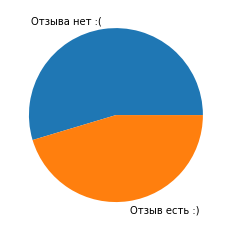

In [3]:
plt.pie(df['Статус'].value_counts(), labels = ['Отзыва нет :(' , 'Отзыв есть :)']);
print('Не на всех страницах присутствуют отзывы :(\n')
print('Количество собранных страниц, \nна которых есть отзывы: {: >15.1%}, \
      \n\nна которых нет отзывов: {: >15.1%}'.format(
    df['Статус'].value_counts()[1]/len(df['Статус']), 
    df['Статус'].value_counts()[0]/len(df['Статус'])))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4589 entries, 0 to 4588
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Номер отзыва          4589 non-null   int64  
 1   Статус                4589 non-null   int64  
 2   Полное название ВУЗа  2082 non-null   object 
 3   ВУЗ кратко            2082 non-null   object 
 4   Факультет/институт    2082 non-null   object 
 5   Дата                  2082 non-null   object 
 6   Отзыв                 2082 non-null   object 
 7   Лайки                 2082 non-null   float64
 8   Тональность           2082 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 233.1+ KB


In [5]:
# Будем работать т.с заполненными строками
df = df.query('Статус != 0')

# # Корректировка формата колонок
df['Дата'] = pd.to_datetime(df['Дата'].apply(change_date_format))
df[['Лайки', 'Тональность']] = df[['Лайки', 'Тональность']].astype(int)

df.head()

,Номер отзыва,Статус,Полное название ВУЗа,ВУЗ кратко,Факультет/институт,Дата,Отзыв,Лайки,Тональность
0,12,1,Балтийский государственный технический универс...,БГТУ им. Д. Ф. Устинова (Военмех),0,2015-10-30,Учусь на 3 курсе одного из лучших факультетов....,39,-1
1,13,1,Национальный исследовательский ядерный универс...,НИЯУ МИФИ,0,2015-10-30,Студентка 3 курса.Многие студенты недолюбливаю...,132,1
2,14,1,Санкт-Петербургский государственный университет,СПбГУ,0,2015-10-30,Пишу в основном про восточный и филологический...,91,0
4,16,1,Ленинградский государственный университет,ЛГУ им. А.С. Пушкина,0,2015-10-31,Хотелось бы рассказать об ЛГУ им. Пушкина. Я с...,11,1
5,17,1,Московский Государственный Университет им. Лом...,МГУ им. Ломоносова,0,2015-10-31,"Я перевелась из МГУ им. Ломоносова, который сч...",220,-1


count    2082.000000
mean      451.712776
std       359.736184
min        67.000000
25%       222.000000
50%       344.000000
75%       549.000000
max      3654.000000
Name: count_words, dtype: float64

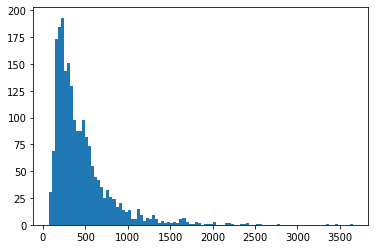

In [6]:
# посчитаем количество слов в описании, и получим описательные статичтики этих данных
def count_words(x):
    return len(x.split())

df['count_words'] = df['Отзыв'].apply(count_words)

display(df.count_words.describe())
plt.hist(df['count_words'], bins=100)
plt.show()

-1    1022
 1     657
 0     403
Name: Тональность, dtype: int64

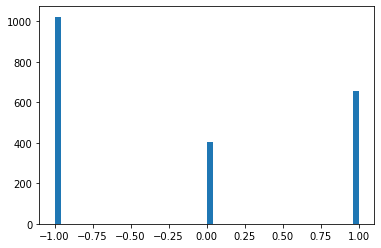

In [7]:
# Посчитаем тональности отзывов
display(df['Тональность'].value_counts())
plt.hist(df['Тональность'], bins=50);

In [8]:
#фиксируем параметры псевдослучайного генератора
seed = 42
random.seed(seed)
np.random.seed(seed)

In [9]:
# Создаю множества стоп-слов и символов пунктуации,
# объекты лемматайзера и стеммера

rus_stop_words = set(stopwords.words('russian'))
punctuation_signs = set(string.punctuation) 

# m = Mystem()
morph_analyzer = pymorphy2.MorphAnalyzer()
russian_stemmer = SnowballStemmer('russian')

In [12]:
def text_processing(text, stemmer_lemmatizer): 
    """
    Функция токенизации текста, очищает от стоп-слов и знаков пунктуации, 
    и возвращает леммы слов.
    Cтеммер / лемматайзер (stemmer_lemmatizer) должны быть заранее определены
    как "russian_sremmer" или "morph_analyzer" соответственно.     
    """
    words = word_tokenize(text.lower())
    words = [word for word in words if word not in rus_stop_words]
    words = [word for word in words if word not in punctuation_signs]

    if stemmer_lemmatizer == morph_analyzer:
        words = [stemmer_lemmatizer.parse(word)[0].normalized.word for word in words]
    elif stemmer_lemmatizer == russian_stemmer:
        words = [stemmer_lemmatizer.stem(word) for word in words]
    words = ' '.join(words)
    return words


In [15]:
# Тестирование функции на примере

text = df['Отзыв'][1]

display(text_processing(text, morph_analyzer))
text_processing(text, russian_stemmer)

'студентка 3 курса.многий студент недолюбливать наш университет плохой сказать могу.д достаточно ненужный дисциплина типо русский язык история преподаватель понимать студент ориентировать технический предмет получить зачёт подобный дисциплина нереально касаться профильный электроника различный вид матана который заставить плакать намного серьезнее.ть основное зависеть преподаватель большинство свой человек адекватный хотя требовать достаточно высокий уровень знание предмет конец семестр успевать накопиться долг который постараться ещё сдать взятка искать нигде никакой хотя требовать думать были.быть хороший лаборатория возможность научный база к весь получить доступ преподаватель готовый тратить свой личный время ваш проэкт заниматься это сам желание пропускать лекция сдать предмет просто прочитать пара книжка освобождать огромный количество времени.хотя преподаватель который любой книга стипендия копеечный увы иметь многие потопучтый сдать отлично очень постараться либо гений обладать

'студентк 3 курса.мног студент недолюблива наш университет плох сказа могу.д достаточн ненужн дисциплин тип русск язык истор преподавател понима студент ориентирова техническ предмет получ зачет подобн дисциплин нереальн каса профильн электроник различн вид мата котор застав плака намн серьезнее.в основн завис преподавател большинств сво люд адекватн хот треб достаточн высок уровен знан предмет конц семестр успева накоп долг котор постара ещ сдат взяток ищ нигд никак хот треб дума были.ест хорош лаборатор возможн научн баз ко всем получ доступ преподавател готов трат сво личн врем ваш проэкт занима эт сам желан пропуска лекц сдат предмет прост прочита пар книжек освобожда огромн количеств времени.хот преподавател котор люб книг стипенд копеечн ув имеют мног потопучт сдат отличн очен постара либ ген облада невероятн везен'

In [16]:
# Добавляю в датафрейм колонки с лемматизированными и стеммированными текстами

df['lemmatized_reviews'] = df['Отзыв'].apply(lambda x: text_processing(x, morph_analyzer)) 
df['stemmed_reviews'] = df['Отзыв'].apply(lambda x: text_processing(x, russian_stemmer)) 
df.head(3)

,Номер отзыва,Статус,Полное название ВУЗа,ВУЗ кратко,Факультет/институт,Дата,Отзыв,Лайки,Тональность,count_words,lemmatized_reviews,stemmed_reviews
0,12,1,Балтийский государственный технический универс...,БГТУ им. Д. Ф. Устинова (Военмех),0,2015-10-30,Учусь на 3 курсе одного из лучших факультетов....,39,-1,173,учиться 3 курс один хороший факультет итак 1. ...,уч 3 курс одн лучш факультет итак 1. преподава...
1,13,1,Национальный исследовательский ядерный универс...,НИЯУ МИФИ,0,2015-10-30,Студентка 3 курса.Многие студенты недолюбливаю...,132,1,197,студентка 3 курса.многий студент недолюбливать...,студентк 3 курса.мног студент недолюблива наш ...
2,14,1,Санкт-Петербургский государственный университет,СПбГУ,0,2015-10-30,Пишу в основном про восточный и филологический...,91,0,170,писать основное восточный филологический факул...,пиш основн восточн филологическ факультет спбг...


In [17]:
lem_train_X, lem_test_X = train_test_split(df['lemmatized_reviews'], test_size=0.20, random_state=seed)
lem_train_y, lem_test_y= train_test_split(df['Тональность'], test_size=0.20, random_state=seed)
lem_all_text = pd.concat([lem_train_X, lem_test_X])

stem_train_X, stem_test_X = train_test_split(df['stemmed_reviews'], test_size=0.20, random_state=seed)
stem_train_y, stem_test_y= train_test_split(df['Тональность'], test_size=0.20, random_state=seed)
stem_all_text = pd.concat([stem_train_X, stem_test_X])

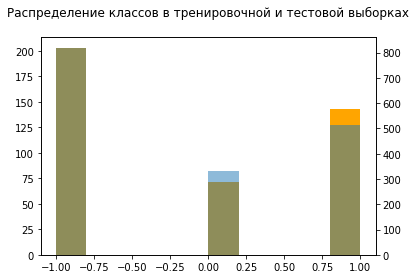

In [18]:
# Проверим распределение ответов по выборкам
fig, ax = plt.subplots()
ax.hist(stem_test_y, color='orange');
ax.set_title("Распределение классов в тренировочной и тестовой выборках\n")
ax1 = ax.twinx()
ax1.hist(stem_train_y, alpha=0.5);
plt.show()

In [19]:
# Векторизую тексты. lemmatized и stemmed тексты скармливаю разным векторайзерам
Tfidf_vectorizer = TfidfVectorizer(min_df=3)
Tfidf_vectorizer.fit(lem_all_text) 
lem_train_X_vectorizer = Tfidf_vectorizer.transform(lem_train_X) 
lem_test_X_vectorizer = Tfidf_vectorizer.transform(lem_test_X)

count_vectorizer = CountVectorizer(min_df=10)
count_vectorizer.fit(stem_all_text) 
stem_train_X_vectorizer = count_vectorizer.transform(stem_train_X) 
stem_test_X_vectorizer = count_vectorizer.transform(stem_test_X)

#### Обучаю и оцениваю модели. За скоринг взял точность (accuracy)

In [20]:
# Буду делать поиск по сетке и выводитть график обучение
def графичек(x, y1, y2):
    fig, ax = plt.subplots(figsize=(6,3) )
    ax.set_title('Визуализация подбора гиперпараметра. Тип модели:\n' + str(type(clf)))
    ax.scatter(x, y1, label='Эфективность на обуч.выборке',  )
    ax.scatter(x, y2, label="Эфективность на тестовой выборке",)
    ax.set_xlabel('Величина гиперпараметра модели')
    ax.set_ylabel('Значение метрики')
    ax.legend()
    ax.grid(color = '#ccc', ls=":")
    plt.tight_layout()
    plt.show()

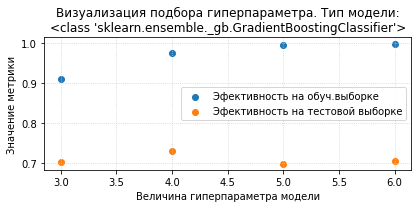

,method,hyperparam_val,acc_train,acc_test
1,GradientBoostingClassifier,4,0.974174,0.729017


In [21]:
# GradientBoostingClassifier

results = pd.DataFrame()
# for max_depth in np.arange(1, 5):
for max_depth in range(3, 7):
    clf = GradientBoostingClassifier(random_state=seed, max_depth=max_depth)
    clf.fit(stem_train_X_vectorizer, stem_train_y)
    preds_train = clf.predict(stem_train_X_vectorizer)
    preds_test = clf.predict(stem_test_X_vectorizer)
    
    results_dict = {
                    'method':'GradientBoostingClassifier',
                    'hyperparam_val':[max_depth],  
                    'acc_train':[accuracy_score(stem_train_y, preds_train)], 
                    'acc_test':[accuracy_score(stem_test_y, preds_test)]
                   }
    
    results_df = pd.DataFrame.from_dict(results_dict)
    results = results.append(results_df)

results.reset_index(inplace=True, drop=True)
r4 = results[results.acc_test == results.acc_test.max()]
графичек(results['hyperparam_val'],results['acc_train'],results['acc_test'])
r4.head(3)

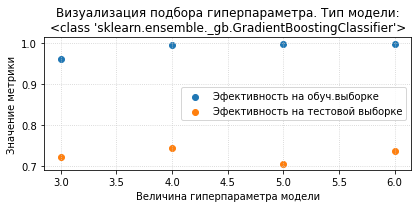

,method,hyperparam_val,acc_train,acc_test
1,GradientBoostingClassifier,4,0.995796,0.743405


In [22]:
# GradientBoostingClassifier

results = pd.DataFrame()
for max_depth in range(3, 7):
    clf = GradientBoostingClassifier(random_state=seed, max_depth=max_depth)
    clf.fit(lem_train_X_vectorizer, lem_train_y)
    preds_train = clf.predict(lem_train_X_vectorizer)
    preds_test = clf.predict(lem_test_X_vectorizer)
    
    results_dict = {
                    'method':'GradientBoostingClassifier',
                    'hyperparam_val':[max_depth],  
                    'acc_train':[accuracy_score(lem_train_y, preds_train)], 
                    'acc_test':[accuracy_score(lem_test_y, preds_test)]
                   }
    
    results_df = pd.DataFrame.from_dict(results_dict)
    results = results.append(results_df)

results.reset_index(inplace=True, drop=True)
r4 = results[results.acc_test == results.acc_test.max()]
графичек(results['hyperparam_val'],results['acc_train'],results['acc_test'])
r4.head(3)

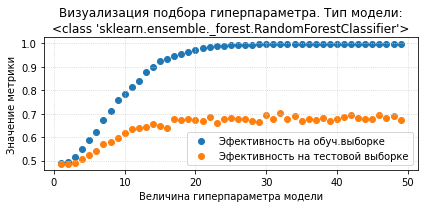

,method,hyperparam_val,acc_train,acc_test
31,RandomForestClassifier,32,0.996997,0.702638


In [23]:
# RandomForestClassifier

results = pd.DataFrame()
for max_depth in range(1, 50):
    clf = RandomForestClassifier(random_state=seed, max_depth=max_depth)
    clf.fit(stem_train_X_vectorizer, stem_train_y)
    preds_train = clf.predict(stem_train_X_vectorizer)
    preds_test = clf.predict(stem_test_X_vectorizer)
    
    results_dict = {
                    'method':'RandomForestClassifier',
                    'hyperparam_val':[max_depth],  
                    'acc_train':[accuracy_score(stem_train_y, preds_train)], 
                    'acc_test':[accuracy_score(stem_test_y, preds_test)]                    
                   }
    
    results_df = pd.DataFrame.from_dict(results_dict)
    results = results.append(results_df)

results.reset_index(inplace=True, drop=True)
r3 = results[results.acc_test == results.acc_test.max()]
графичек(results['hyperparam_val'],results['acc_train'],results['acc_test'])
r3.head(3)

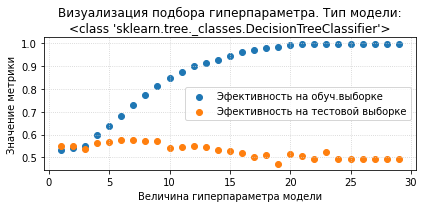

,method,hyperparam_val,acc_train,acc_test
6,DecisionTreeClassifier,7,0.73033,0.577938


In [24]:
# DecisionTreeClassifier

results = pd.DataFrame()
for max_depth in np.arange(1, 30):
    clf = DecisionTreeClassifier(random_state=seed, max_depth=max_depth)
    clf.fit(stem_train_X_vectorizer, stem_train_y)
    preds_train = clf.predict(stem_train_X_vectorizer)
    preds_test = clf.predict(stem_test_X_vectorizer)
    
    results_dict = {
                    'method':'DecisionTreeClassifier',
                    'hyperparam_val':[max_depth],  
                    'acc_train':[accuracy_score(stem_train_y, preds_train)], 
                    'acc_test':[accuracy_score(stem_test_y, preds_test)] 
                    }
    results_df = pd.DataFrame.from_dict(results_dict)
    results = results.append(results_df)

results.reset_index(inplace=True, drop=True)
r2 = results[results.acc_test == results.acc_test.max()]
графичек(results['hyperparam_val'],results['acc_train'],results['acc_test'])
r2.head(3)

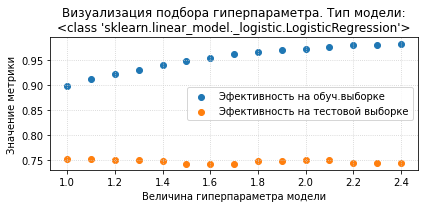

,method,hyperparam_val,acc_train,acc_test
0,LogisticRegression,1.0,0.897898,0.752998
1,LogisticRegression,1.1,0.912913,0.752998


In [25]:
# LogisticRegression

results = pd.DataFrame()
for C_search in np.arange(1, 2.5,.1):
    clf = LogisticRegression(random_state=seed, C=C_search, max_iter=2000)
    clf.fit(lem_train_X_vectorizer , lem_train_y)
    preds_train = clf.predict(lem_train_X_vectorizer)
    preds_test = clf.predict(lem_test_X_vectorizer)
    
    results_dict = {
                    'method':'LogisticRegression',
                    'hyperparam_val':[C_search],  
                    'acc_train':[accuracy_score(lem_train_y, preds_train)], 
                    'acc_test':[accuracy_score(lem_test_y, preds_test)]
                    }
    
    results_df = pd.DataFrame.from_dict(results_dict)
    results = results.append(results_df)

results.reset_index(inplace=True, drop=True)
r1 = results[results.acc_test == results.acc_test.max()]

графичек(results['hyperparam_val'],results['acc_train'],results['acc_test'])
r1.head(3)

## ТРОЙКА ЛУЧШИХ...

In [26]:
results_best = pd.concat([r1,r2,r3,r4], axis=0).reset_index(drop=True)
results_best.sort_values(by='acc_test', ascending=False).reset_index(drop=True).head(3)

,method,hyperparam_val,acc_train,acc_test
0,LogisticRegression,1.0,0.897898,0.752998
1,LogisticRegression,1.1,0.912913,0.752998
2,GradientBoostingClassifier,4.0,0.995796,0.743405


# Классификация дает ~75% точности. 
Попробую кластеризацию. 

In [27]:
#K-means
from sklearn.cluster import KMeans

term_document_matrix = Tfidf_vectorizer.fit_transform(df['lemmatized_reviews'])
k_means = KMeans(n_clusters=3, random_state=seed)
k_means.fit(term_document_matrix)
k_means_topics = k_means.labels_ # метка топика для каждого текста, полученная из k_means 
df['k_means_topic'] = k_means_topics 
df['k_means_topic'].value_counts().sort_index()

0    1028
1     264
2     790
Name: k_means_topic, dtype: int64

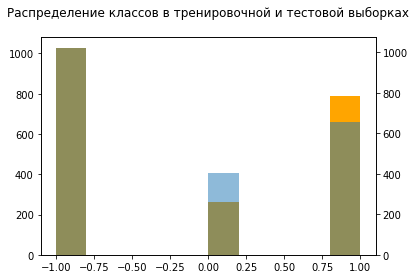

In [28]:
df['k_means_topic'] = df['k_means_topic'].apply(lambda x: x-1)  

fig, ax = plt.subplots()
ax.hist(df['k_means_topic'], color='orange');
ax.set_title("Распределение классов в тренировочной и тестовой выборках\n")
ax1 = ax.twinx()
ax1.hist(df['Тональность'], alpha=0.5);
plt.show()

In [29]:
# Посмотрим, что внутри
df[['k_means_topic', 'Тональность']].sample(30)

,k_means_topic,Тональность
3004,1,-1
1957,-1,-1
3349,0,-1
52,-1,-1
1452,1,-1
1955,-1,1
163,-1,0
2874,0,-1
4485,1,-1
82,-1,1


# Модель определения тональности "Достоевский"

In [30]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

df_2 = df[['Отзыв', 'Тональность']].reset_index(drop=True)

tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)
dostoevskii = model.predict(df_2['Отзыв'], k=1)

dostoevskii = pd.DataFrame(dostoevskii)
dostoevskii.head()
dostoevskii = model.predict(df_2['Отзыв'], k=1)
dostoevskii = pd.DataFrame(dostoevskii)
df_2 = pd.concat([df_2[['Тональность']], dostoevskii], axis = 1)
df_2.sample(30)

,Тональность,neutral,positive,negative
1451,-1,0.500010,NaN,NaN
1709,-1,0.523430,NaN,NaN
731,-1,0.484390,NaN,NaN
544,1,0.546748,NaN,NaN
954,1,0.592677,NaN,NaN
109,0,NaN,NaN,0.422515
1315,0,0.562187,NaN,NaN
1034,1,0.320831,NaN,NaN
1055,-1,NaN,NaN,0.407343
715,0,0.546748,NaN,NaN


In [ ]:
:(